In [3]:
import pandas as pd # dataframe
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline # so jupyter notebook shows the figures

UsageError: unrecognized arguments: # so jupyter notebook shows the figures


In [4]:
df = pd.read_csv("HbA1c_Peptide27.csv",index_col=0) # use first column as index

In [5]:
df.head()

,Peptide _27,HbA1c _(%),Class
SampleID,,,
2,63.09,5.2,1
3,69.98,5.9,1
4,54.50,5.6,1
5,33.92,4.8,1
6,37.19,6.2,1


In [6]:
df.at[3,'Peptide_27']

KeyError: 'Peptide_27'

In [ ]:
df.loc[3] # selecting a row

In [ ]:
df['Peptide_27'] # selecting a column

In [7]:
#df['WHR'] = pd.to_numeric(df['WHR'].str.replace(' ',''))
df = df.fillna(df.mean())
df.head()

,Peptide _27,HbA1c _(%),Class
SampleID,,,
2,63.09,5.2,1
3,69.98,5.9,1
4,54.50,5.6,1
5,33.92,4.8,1
6,37.19,6.2,1


In [8]:
df_norm = df/df.max()

In [9]:
NGT = pd.melt(df_norm[df_norm['Class'] == 0],value_vars=df_norm.columns[:-1])
NGT['class'] = "NGT"
NGT.head()

,variable,value,class
0,Peptide _27,0.216490,NGT
1,Peptide _27,0.414118,NGT
2,Peptide _27,0.180194,NGT
3,Peptide _27,0.502715,NGT
4,Peptide _27,0.380252,NGT


In [10]:
T2D = pd.melt(df_norm[df_norm['Class'] == 1],value_vars=df_norm.columns[:-1])
T2D['class'] = "T2D"
T2D.head()

,variable,value,class
0,Peptide _27,0.901543,T2D
1,Peptide _27,1.000000,T2D
2,Peptide _27,0.778794,T2D
3,Peptide _27,0.484710,T2D
4,Peptide _27,0.531438,T2D


In [11]:
plot_df = pd.concat([T2D,NGT])
plot_df.head()

,variable,value,class
0,Peptide _27,0.901543,T2D
1,Peptide _27,1.000000,T2D
2,Peptide _27,0.778794,T2D
3,Peptide _27,0.484710,T2D
4,Peptide _27,0.531438,T2D


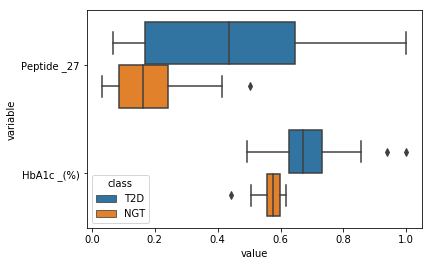

In [12]:
sns.boxplot(y='variable',x='value',hue='class',data=plot_df)